# STA 561 Lab 6: Stochastic Approximation

## Adapted from the Lab Notebook Created by Vinayak Gupta
## Prepared by Jiachang Liu

Main objectives:
- Overview of Stochastic Approximation
- Robbins–Monro Algorithm
- Kiefer–Wolfowitz Algorithm
- Stochastic Gradient Descent

Additional Resources:
- https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-22/issue-3/A-Stochastic-Approximation-Method/10.1214/aoms/1177729586.full
- https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-23/issue-3/Stochastic-Estimation-of-the-Maximum-of-a-Regression-Function/10.1214/aoms/1177729392.full
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
- https://en.wikipedia.org/wiki/Stochastic_approximation#Robbins–Monro_algorithm
- https://en.wikipedia.org/wiki/Stochastic_approximation#Kiefer–Wolfowitz_algorithm
- https://en.wikipedia.org/wiki/Stochastic_gradient_descent
- https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/

### 1. Overview of Stochastic Approximation 

Stochastic approximation algorithms are recursive update rules that can be used to approximately solve optimization problems and linear systems when the collected data is subject to noise. It is often used when you do not have a mathematical model of the system (or is very complex) but still would like to optimize its behavior by adjusting certain parameters. 

In a nutshell, stochastic approximation algorithms deal with a function of the form $f(\theta)=E_{\xi} ⁡ [ F ( \theta , \xi ) ]$ which is the expected value of a function depending on a random variable $\xi$. The goal is to recover properties of such a function f without evaluating it directly. Instead, stochastic approximation algorithms use random samples of $F (\theta , \xi )$ to efficiently approximate properties of $f$ such as zeros or extrema.

In this lab, we would briefly discuss some of the older stochastic approximation algorithms like Robbins-Monro and Kiefer-Wolfowitz followed by the more recent and commonly used Stochastic Gradient Descent

### 2. Robbins-Monro Algorithm

In 1951, Robbins and Monro published one of the earliest stochastic approximation algorithm which provided a way to find the root of a nondecreasing function. 

Assume that we have a function $M(\theta)$, and a constant $\alpha$, such that the equation $M ( \theta) = \alpha$ has a unique root at $\theta^∗$. It is assumed that while we cannot directly observe the function $M(\theta)$, we can instead obtain measurements of the random variable $N(\theta)$ where $E[N(\theta)] = M (\theta )$. The structure of the algorithm is to then generate iterates of the form: 

$$\theta_{n+1}=\theta_n - a_n(N(\theta_n) - \alpha)$$

where  $a_1,a_2,\dots$ is a sequence of positive step sizes. Robbins and Monro prove that $\theta_n$  converges in mean square (hence also in probability) to $\theta^∗$ if the following conditions are satisfied:

* $N (\theta)$ is uniformly bounded ($\lvert N(\theta)\rvert \leq c$ for some $c$. https://en.wikipedia.org/wiki/Uniform_boundedness)
* $M (\theta )$ is nondecreasing
* $M′ (\theta^∗ )$ exists and is positive
* The sequence $a_n$ satisfies the following requirements:

     $$\qquad \sum^{\infty}_{n=0}a_n = \infty \quad \text{ and } \quad \sum^{\infty}_{n=0}a^2_n < \infty \quad $$

A particular sequence of steps which satisfy these conditions, and was suggested by Robbins–Monro, have the form: $a_n = a/n$ , for $a > 0$.


**Example: Approximate solution for Sigmoid function using Robbins-Monro Algorithm**

Find $x$ such that $1/(1+e^{-x}) = 0.5$

Final theta estimate is :  0.0031604830301230668


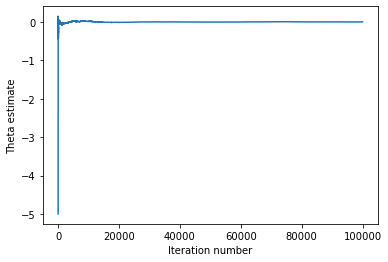

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

def fn_N(theta):
    pass

def next_theta(theta,alpha,step_size): 
    theta_next = theta - step_size(fn_N(theta) - alpha)
    pass

theta = -5 #Initial theta
alpha = 0.5 # Find x s.t. 1/(1+ exp(-x))= 0.5  => x = 0
thetas=[theta] #

for iterations in range(1,10**5):
    step_size= 3/iterations
    theta = next_theta(theta,alpha,step_size)
    thetas.append(theta)

plt.plot(range(10**5),thetas)
plt.xlabel("Iteration number")
plt.ylabel("Theta estimate")
print("Final theta estimate is : ",theta)

As we can see, all the conditions for Robbins-Monro algorithm are satisfied:

* sigmoid function $M(\theta)$ is a nondecreasing function
* $N(\theta)$ is a noisy version of sigmoid function and is uniformly bounded
* Derivative of sigmoid function at $\theta^*$ is non zero
* The sequences $a_n$ satisfy the given requirements

The asymptotically optimal convergence rate for the algorithm is $O(1/ \sqrt{n})$ for the general case. This can be speeden up to $O(1/n)$ in case the function is twice continuously differentiable and strongly convex. While theoretically this bound of $O(1/n)$  is fast, it can perform quite poorly upon implementation. This is primarily due to the fact that the algorithm is very sensitive to the choice of the step size sequence, and the supposed asymptotically optimal step size policy can be quite harmful in the beginning.

### 3. Kiefer–Wolfowitz Algorithm 

The Kiefer–Wolfowitz algorithm was introduced in 1952 by Jacob Wolfowitz and Jack Kiefer and was motivated by the Robbins–Monro algorithm. The algorithm was presented as a method which would stochastically estimate the maximum of a function.

Let $M(x)$ be a function which has a maximum at the point $\theta $. It is assumed that $M(x)$ is unknown; however, certain observations $N(x)$, where $E[N(x)] = M(x)$, can be made at any point $x$. The structure of the algorithm follows a gradient-like method, with the iterates being generated as follows:

$$x_{n+1} = x_n + a_n \bigg(\frac{N(x_n + c_n) - N(x_n -c_n)}{2 c_n} \bigg)$$

where $N(x_n + c_n)$ and $N(x_n - c_n)$ are independent, and the gradient of $M(x)$ is approximated using finite differences (https://en.wikipedia.org/wiki/Finite_difference). The sequence $\{c_n\}$ specifies the sequence of finite difference widths used for the gradient approximation, while the sequence $\{a_n\}$ specifies a sequence of positive step sizes taken along that direction. Kiefer and Wolfowitz proved that, if $M(x)$ satisfied certain regularity conditions, then $x_n$ will converge to $\theta$ in probability as $n\to\infty$, and later Blum in 1954 showed $x_n$ converges to $\theta$ almost surely, provided that:

* $Var(N(x))\le S<\infty$ for all $x$.
<br/><br/>
* The function $M(x)$ has a unique point of maximum (minimum) and is strongly concave (convex) (see strongly convexity https://en.wikipedia.org/wiki/Convex_function#Strongly_convex_functions)
<br/><br/>
* The function $M(x)$ satisfies the regularity conditions as follows:

    * There exists $\beta>0$ and $B>0$ such that $$|x'-\theta|+|x''-\theta|<\beta \quad \Longrightarrow \quad |M(x')-M(x'')|<B|x'-x''|$$
    
    * There exists $ \rho>0$ and $ R>0 $ such that $$|x'-x''|<\rho \quad \Longrightarrow \quad |M(x')-M(x'')|<R$$ 
    
    * For every $ \delta>0 $, there exists some $\pi(\delta)>0 $ such that $$|z-\theta|>\delta \quad \Longrightarrow \quad \inf_{\delta/2>\varepsilon>0}\frac{|M(z+\varepsilon)-M(z-\varepsilon)|}{\varepsilon}>\pi(\delta)$$
    

* The selected sequences $\{a_n\}$ and $\{c_n\}$ must be infinite sequences of positive numbers such that

    * $ c_n \rightarrow 0\quad \text{as}\quad n\to\infty $
    * $ \sum^\infty_{n=0} a_n =\infty $
    * $ \sum^\infty_{n=0} a_nc_n <\infty $
    * $ \sum^\infty_{n=0} a_n^2c_n^{-2} <\infty $

A suitable choice of sequences, as recommended by Kiefer and Wolfowitz, would be $a_n = 1/n$ and $c_n = n^{-1/3}$.


**Example: Approximate maximum for negative squared function using Kiefer–Wolfowitz Algorithm**

/usr/xtmp/jl888/anaconda3/envs/ADTree/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Final X estimate is :  [2.07793013]


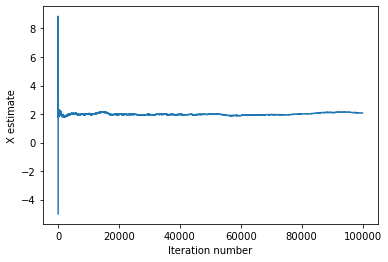

In [5]:
def fn_N(x):
    pass

def next_x(x,a_n,c_n): 
    pass

x = -5 #Initial x
xs=[x] #

for iterations in range(1,10**5):
    a_n= 1/iterations
    c_n = iterations**(-1/3) 
    x = next_x(x,a_n,c_n)
    xs.append(x)

plt.plot(range(10**5),xs)
plt.xlabel("Iteration number")
plt.ylabel("X estimate")
print("Final X estimate is : ",x)

All the conditions for Robbins-Monro algorithm are satisfied:

* $Var(N(X)) = 1$
* $M(X)$ has a unique point of maximum at $X=2$
* $M(X)$ satisfies the regularity conditions
* The sequences $a_n$ and $c_n$ satisfy the given requirements

The Kiefer Wolfowitz algorithm requires that for each gradient computation, at least $d + 1$ different parameter values must be simulated for every iteration of the algorithm, where $d$ is the dimension of the search space. This means that when $d$ is large, the Kiefer–Wolfowitz algorithm will require substantial computational effort per iteration, leading to slow convergence. Also, the fact that the function be strongly convex/concave is fairly restrictive and highly unrealistic

### 4. Stochastic Gradient Descent

Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties. It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems or when the datasets are huge, this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate.

In SGD, we use only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration. So, in SGD, we find out the gradient of the cost function of a single example at each iteration instead of the sum of the gradient of the cost function of all the examples (as in Gradient Descent). Suppose we are optimizing for function $Q$ on the parameters $w$ with learning rate $\eta$, then:

**Gradient Descent**: 
 $$ w_{j+1} = w_j - \frac{\eta}{n} \sum_{i=1}^n \nabla Q_i(w),$$
 
 whereas,
 
 **Stochastic Gradient Descent**: 
 $$ w_{j+1} = w_j - \eta \nabla Q_i(w),$$


Since only one sample from the dataset is chosen at random for each iteration, the path taken by the algorithm to reach the minima is usually noisier than your typical Gradient Descent algorithm. But that doesn’t matter all that much because the path taken by the algorithm does not matter, as long as we reach the minima and with significantly shorter training time. This convergence of stochastic gradient descent has been analyzed using the theories of convex minimization and of stochastic approximation. Briefly, when the learning rates $\eta$ decrease with an appropriate rate, and subject to relatively mild assumptions, stochastic gradient descent converges almost surely to a global minimum when the objective function is convex or pseudoconvex, and otherwise converges almost surely to a local minimum.

Left figure below shows a noisy though faster path followed by SGD while optimizing for a function whereas on the right, we can see a smooth slow path followed by GD.
<img src="./SGDversusGD.PNG">

**SGD on Boston Housing Dataset using sklearn**

In [7]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Load and scale the data
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

print("X Shape: ",X.shape)
print("Y Shape: ",Y.shape)
print("X_Train Shape: ",x_train.shape)
print("X_Test Shape: ",x_test.shape)
print("Y_Train Shape: ",y_train.shape)
print("Y_Test Shape: ",y_test.shape)

# standardizing data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

X Shape:  (506, 13)
Y Shape:  (506,)
X_Train Shape:  (354, 13)
X_Test Shape:  (152, 13)
Y_Train Shape:  (354,)
Y_Test Shape:  (152,)


-- Epoch 1
Norm: 4.43, NNZs: 13, Bias: 14.742055, T: 354, Avg. loss: 103.345357
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5.02, NNZs: 13, Bias: 18.627488, T: 708, Avg. loss: 25.608032
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.34, NNZs: 13, Bias: 20.328266, T: 1062, Avg. loss: 14.199684
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.40, NNZs: 13, Bias: 21.125561, T: 1416, Avg. loss: 11.555711
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.56, NNZs: 13, Bias: 21.538302, T: 1770, Avg. loss: 10.767358
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.55, NNZs: 13, Bias: 21.775764, T: 2124, Avg. loss: 10.458798
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.66, NNZs: 13, Bias: 21.877041, T: 2478, Avg. loss: 10.317887
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.65, NNZs: 13, Bias: 21.955161, T: 2832, Avg. loss: 10.215312
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.69, NNZs: 13, Bias: 22.018884, T: 3186, Avg. loss: 10.130083
T

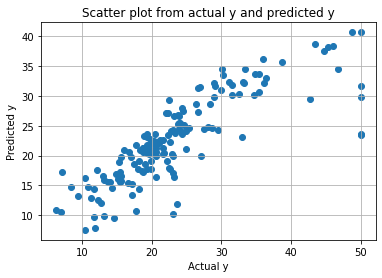

Mean Squared Error : 29.97152803819996


In [9]:
# Fit SGDRegressor on the training data and evaluate on test data
n_iter=100
clf_ = SGDRegressor(max_iter=n_iter, verbose=1)
clf_.fit(x_train, y_train)
y_pred_sksgd=clf_.predict(x_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sksgd))

In the logging output, it can be seen how the loss varies at every epoch of SGD. While in general, each step results in lower loss, sometimes due to stochasticity of the algorithm, the loss increases.